In [22]:
import os


home_dir=os.getcwd()

data_dir = os.path.join(home_dir,"roiData")
data_dir2 =  os.path.join(home_dir,"func_preproc")
home_dir,data_dir,data_dir2

In [24]:
# rois_dir = os.path.join(data_dir, 'data', 'rois')
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

In [25]:
if not os.path.exists(data_dir2):
    os.makedirs(data_dir2)

In [26]:
from nilearn import datasets
from nilearn import decomposition
from nilearn import plotting,image

import numpy as np

from nilearn.input_data import NiftiMapsMasker

from nilearn.regions import RegionExtractor

from nilearn.connectome import ConnectivityMeasure
import matplotlib.pyplot as plt

In [27]:
# for fetching dataset for first instance only
abide = datasets.fetch_abide_pcp(data_dir= data_dir2,derivatives=['func_preproc'],
                        SITE_ID=['NYU'],
#                         n_subjects=3
                                )
print(abide.keys())


func = abide.func_preproc

dict_keys(['description', 'phenotypic', 'func_preproc'])


In [79]:
type(func)

list

In [28]:
def get_key(filename):
    f_split = filename.split('_')
#     print(f_split)
    if f_split[2] == 'func':
        key = '_'.join(f_split[0:2]) 
    else:
        key = ""
    return key

In [29]:
fetched_data = os.path.join(data_dir2,"ABIDE_pcp")
fetched_data

"C:\\Users\\Reek's\\workspace\\ finalDataMining Codes\\func_preproc\\ABIDE_pcp"

In [30]:
flist = os.listdir(fetched_data)
flist2 = os.listdir(os.path.join(fetched_data,flist[0]))
flist3 =  os.listdir(os.path.join(fetched_data,flist[0],flist2[0]))
flist,flist2,flist3
flist3[0].split('_')

['NYU', '0050952', 'func', 'preproc.nii.gz']

In [81]:
func

["C:\\Users\\Reek's\\workspace\\ finalDataMining Codes\\func_preproc\\ABIDE_pcp\\cpac\\nofilt_noglobal\\NYU_0050952_func_preproc.nii.gz",
 "C:\\Users\\Reek's\\workspace\\ finalDataMining Codes\\func_preproc\\ABIDE_pcp\\cpac\\nofilt_noglobal\\NYU_0050954_func_preproc.nii.gz",
 "C:\\Users\\Reek's\\workspace\\ finalDataMining Codes\\func_preproc\\ABIDE_pcp\\cpac\\nofilt_noglobal\\NYU_0050955_func_preproc.nii.gz",
 "C:\\Users\\Reek's\\workspace\\ finalDataMining Codes\\func_preproc\\ABIDE_pcp\\cpac\\nofilt_noglobal\\NYU_0050956_func_preproc.nii.gz",
 "C:\\Users\\Reek's\\workspace\\ finalDataMining Codes\\func_preproc\\ABIDE_pcp\\cpac\\nofilt_noglobal\\NYU_0050957_func_preproc.nii.gz",
 "C:\\Users\\Reek's\\workspace\\ finalDataMining Codes\\func_preproc\\ABIDE_pcp\\cpac\\nofilt_noglobal\\NYU_0050958_func_preproc.nii.gz",
 "C:\\Users\\Reek's\\workspace\\ finalDataMining Codes\\func_preproc\\ABIDE_pcp\\cpac\\nofilt_noglobal\\NYU_0050959_func_preproc.nii.gz",
 "C:\\Users\\Reek's\\workspace\\ f

In [83]:
prefix_path = os.path.join(fetched_data,flist[0],flist2[0])
prefix_path+"\\"+flist3[0]

"C:\\Users\\Reek's\\workspace\\ finalDataMining Codes\\func_preproc\\ABIDE_pcp\\cpac\\nofilt_noglobal\\NYU_0050952_func_preproc.nii.gz"

In [84]:
func2 = []
for filename in flist3:
    func2.append(prefix_path+"\\"+filename)

In [90]:

# use it if not downloading the dataset
# func2 == func
# if (func2==func):
#     func=func2


True

In [92]:
# import nibabel as nib

# func_nib = nib.load(func2[0])
# print(func_nib)

In [94]:
func_nib.shape,func_nib.get_fdata()

((61, 73, 61, 176),
 array([[[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],
 
         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],
 
         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]],
 
         ...,
 
         [[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0.

In [33]:
print(len(flist3))
file_key_list=[]
for f in range(len(flist3)):
    file_key_list.append(get_key(flist3[f]))
# file_key_list

172


In [34]:
import pandas as pd

df_labels = pd.read_csv(os.path.join(fetched_data,'Phenotypic_V1_0b_preprocessed1.csv'))#path 
# print(df_labels)

df_labels.DX_GROUP = df_labels.DX_GROUP.map({1: 1, 2:0})
# print(len(df_labels))

In [35]:
labels = {}
for row in df_labels.iterrows():
    file_id = row[1]['FILE_ID']
    y_label = row[1]['DX_GROUP']
    if file_id == 'no_filename':
        continue
    assert(file_id not in labels)
    labels[file_id] = y_label

In [36]:
# labels
# ,file_key_list

In [37]:

def get_label(filename):
    assert (filename in labels)
    return labels[filename]



In [38]:
# Method 1
# CANICA

canica = decomposition.CanICA(n_components=20,
                              mask_strategy='background',
                              n_init=10)
canica.fit(func)


CanICA(detrend=True, do_cca=True, high_pass=None, low_pass=None, mask=None,
       mask_args=None, mask_strategy='background', memory=Memory(location=None),
       memory_level=0, n_components=20, n_init=10, n_jobs=1, random_state=None,
       smoothing_fwhm=6, standardize=True, t_r=None, target_affine=None,
       target_shape=None, threshold='auto', verbose=0)

In [39]:
components = canica.components_img_
# Use CanICA's masker to project the components back into 3D space
# components_img = canica.masker_.inverse_transform(components)

In [40]:
# the following line: saves components in file
components.to_filename('canica_resting_state.nii.gz')

C:\Users\Reek\anaconda3.0\envs\data_mining2\lib\site-packages\nilearn\plotting\displays.py:99: UserWarning: linewidths is ignored by contourf
  **kwargs)
C:\Users\Reek\anaconda3.0\envs\data_mining2\lib\site-packages\numpy\ma\core.py:2795: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)
C:\Users\Reek\anaconda3.0\envs\data_mining2\lib\site-packages\nilearn\plotting\displays.py:99: UserWarning: No contour levels were found within the data range.
  **kwargs)


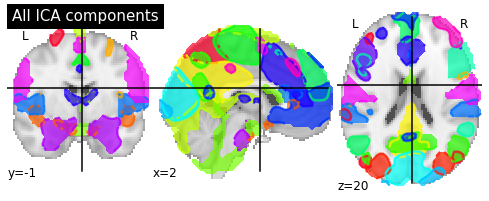

In [41]:
from nilearn.plotting import plot_prob_atlas

# Plot all ICA components together
plot_prob_atlas(components, title='All ICA components')

C:\Users\Reek\anaconda3.0\envs\data_mining2\lib\site-packages\nilearn\plotting\displays.py:1596: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  fraction * (x1 - x0), y1 - y0])


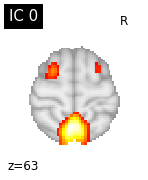

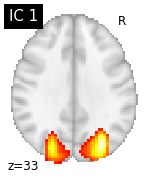

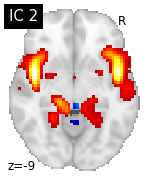

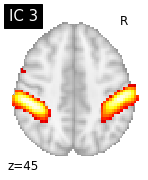

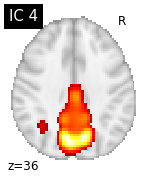

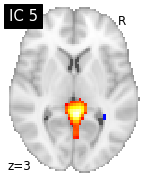

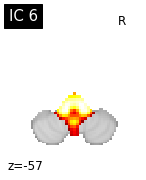

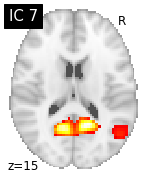

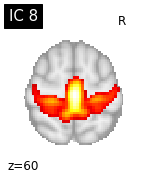

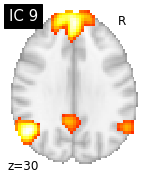

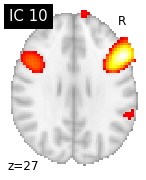

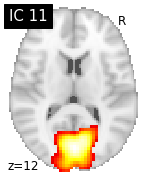

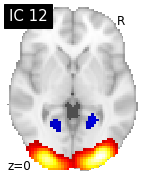

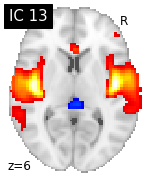

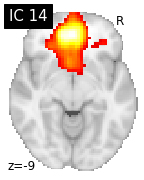

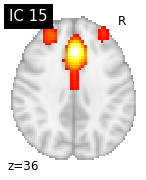

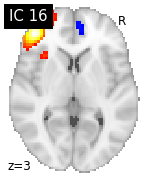

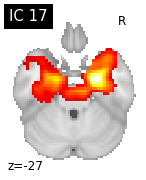

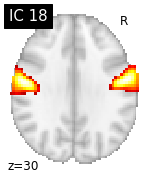

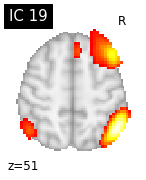

In [42]:
from nilearn.image import iter_img
from nilearn.plotting import plot_stat_map, show

for i, cur_img in enumerate(iter_img(components)):
    plot_stat_map(cur_img, display_mode="z", title="IC %d" % i,
                  cut_coords=1, colorbar=False)

In [43]:
from nilearn.decomposition import DictLearning

dict_learning = DictLearning(n_components=20,
                             memory="nilearn_cache", memory_level=2,
                             verbose=1,
                             random_state=0,
                             n_epochs=1,
                             mask_strategy='background')

print('[Example] Fitting dicitonary learning model')
dict_learning.fit(func)
print('[Example] Saving results')
# Grab extracted components umasked back to Nifti image.
# Note: For older versions, less than 0.4.1. components_img_
# is not implemented. See Note section above for details.
dictlearning_components_img = dict_learning.components_img_
dictlearning_components_img.to_filename('dictionary_learning_resting_state.nii.gz')

[Example] Fitting dicitonary learning model
[MultiNiftiMasker.fit] Loading data from [C:\Users\Reek's\workspace\ finalDataMining Codes\func_preproc\ABIDE_pcp\cpac\nofilt_noglobal\NYU_0050952_func_preproc.nii.gz, C:\Users\Reek's\workspace\ finalDataMining Codes\func_preproc\ABIDE_pcp\c
[MultiNiftiMasker.fit] Computing mask


C:\Users\Reek\anaconda3.0\envs\data_mining2\lib\site-packages\nilearn\masking.py:434: UserWarning: Persisting input arguments took 0.77s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  smooth=False)
C:\Users\Reek\anaconda3.0\envs\data_mining2\lib\site-packages\nilearn\masking.py:434: UserWarning: Persisting input arguments took 0.78s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  smooth=False)
C:\U

[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('C:\Users\Reek's\workspace\ finalDataMining Codes\func_preproc\ABIDE_pcp\cpac\nofilt_noglobal\NYU_0050952_func_preproc.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('C:\Users\Reek's\workspace\ finalDataMining Codes\func_preproc\ABIDE_pcp\cpac\nofilt_noglobal\NYU_0050954_func_preproc.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('C:\Users\Reek's\workspace\ finalDataMining Codes\func_preproc\ABIDE_pcp

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('C:\Users\Reek's\workspace\ finalDataMining Codes\func_preproc\ABIDE_pcp\cpac\nofilt_noglobal\NYU_0050977_func_preproc.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('C:\Users\Reek's\workspace\ finalDataMining Codes\func_preproc\ABIDE_pcp\cpac\nofilt_noglobal\NYU_0050978_func_preproc.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('C:\Users\Reek's\workspace\ finalDataMining Codes\func_preproc\ABIDE_pcp\cpac

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('C:\Users\Reek's\workspace\ finalDataMining Codes\func_preproc\ABIDE_pcp\cpac\nofilt_noglobal\NYU_0051000_func_preproc.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('C:\Users\Reek's\workspace\ finalDataMining Codes\func_preproc\ABIDE_pcp\cpac\nofilt_noglobal\NYU_0051001_func_preproc.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('C:\Users\Reek's\workspace\ finalDataMining Codes\func_preproc\ABIDE_pcp\cpac

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('C:\Users\Reek's\workspace\ finalDataMining Codes\func_preproc\ABIDE_pcp\cpac\nofilt_noglobal\NYU_0051024_func_preproc.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('C:\Users\Reek's\workspace\ finalDataMining Codes\func_preproc\ABIDE_pcp\cpac\nofilt_noglobal\NYU_0051025_func_preproc.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('C:\Users\Reek's\workspace\ finalDataMining Codes\func_preproc\ABIDE_pcp\cpac

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('C:\Users\Reek's\workspace\ finalDataMining Codes\func_preproc\ABIDE_pcp\cpac\nofilt_noglobal\NYU_0051048_func_preproc.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('C:\Users\Reek's\workspace\ finalDataMining Codes\func_preproc\ABIDE_pcp\cpac\nofilt_noglobal\NYU_0051049_func_preproc.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('C:\Users\Reek's\workspace\ finalDataMining Codes\func_preproc\ABIDE_pcp\cpac

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('C:\Users\Reek's\workspace\ finalDataMining Codes\func_preproc\ABIDE_pcp\cpac\nofilt_noglobal\NYU_0051069_func_preproc.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('C:\Users\Reek's\workspace\ finalDataMining Codes\func_preproc\ABIDE_pcp\cpac\nofilt_noglobal\NYU_0051070_func_preproc.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('C:\Users\Reek's\workspace\ finalDataMining Codes\func_preproc\ABIDE_pcp\cpac

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('C:\Users\Reek's\workspace\ finalDataMining Codes\func_preproc\ABIDE_pcp\cpac\nofilt_noglobal\NYU_0051091_func_preproc.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('C:\Users\Reek's\workspace\ finalDataMining Codes\func_preproc\ABIDE_pcp\cpac\nofilt_noglobal\NYU_0051093_func_preproc.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('C:\Users\Reek's\workspace\ finalDataMining Codes\func_preproc\ABIDE_pcp\cpac

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('C:\Users\Reek's\workspace\ finalDataMining Codes\func_preproc\ABIDE_pcp\cpac\nofilt_noglobal\NYU_0051114_func_preproc.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('C:\Users\Reek's\workspace\ finalDataMining Codes\func_preproc\ABIDE_pcp\cpac\nofilt_noglobal\NYU_0051116_func_preproc.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('C:\Users\Reek's\workspace\ finalDataMining Codes\func_preproc\ABIDE_pcp\cpac

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('C:\Users\Reek's\workspace\ finalDataMining Codes\func_preproc\ABIDE_pcp\cpac\nofilt_noglobal\NYU_0051154_func_preproc.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('C:\Users\Reek's\workspace\ finalDataMining Codes\func_preproc\ABIDE_pcp\cpac\nofilt_noglobal\NYU_0051155_func_preproc.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('C:\Users\Reek's\workspace\ finalDataMining Codes\func_preproc\ABIDE_pcp\cpac

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.003515, ..., 0.002783],
       ...,
       [0.002616, ..., 0.001707]]), whiten=True, fun='cube', random_state=209652396)
__________________________________________________________fastica - 2.4s, 0.0min
[DictLearning] Computing initial loadings

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s finished



________________________________________________________________________________
[Memory] Calling nilearn.decomposition.dict_learning._compute_loadings...
_compute_loadings(array([[-0.000499, ..., -0.001454],
       ...,
       [ 0.001117, ..., -0.000665]]), 
array([[3.375016, ..., 3.978384],
       ...,
       [1.730283, ..., 1.35549 ]]))


C:\Users\Reek\anaconda3.0\envs\data_mining2\lib\site-packages\nilearn\decomposition\dict_learning.py:233: UserWarning: Persisting input arguments took 3.93s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  self.components_init_, data)


_________________________________________________compute_loadings - 4.9s, 0.1min
[DictLearning] Learning dictionary
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._dict_learning.dict_learning_online...
dict_learning_online(array([[3.375016, ..., 1.730283],
       ...,
       [3.978384, ..., 1.35549 ]]), 20, alpha=10, n_iter=3609, batch_size=20, method='cd', dict_init=array([[ 0.278786, ..., -0.156156],
       ...,
       [ 0.198806, ...,  0.1191  ]]), verbose=0, random_state=0, return_code=True, shuffle=True, n_jobs=1)


C:\Users\Reek\anaconda3.0\envs\data_mining2\lib\site-packages\nilearn\decomposition\dict_learning.py:264: UserWarning: Persisting input arguments took 3.97s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  n_jobs=1)


____________________________________________dict_learning_online - 33.9s, 0.6min
[Example] Saving results


C:\Users\Reek\anaconda3.0\envs\data_mining2\lib\site-packages\nilearn\plotting\displays.py:99: UserWarning: linewidths is ignored by contourf
  **kwargs)
C:\Users\Reek\anaconda3.0\envs\data_mining2\lib\site-packages\nilearn\plotting\displays.py:99: UserWarning: No contour levels were found within the data range.
  **kwargs)


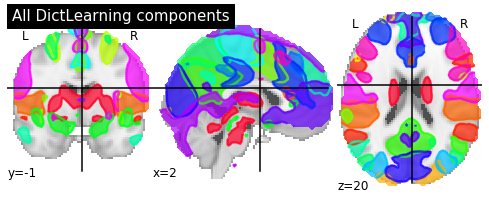

In [44]:
plot_prob_atlas(dictlearning_components_img,
                title='All DictLearning components')

C:\Users\Reek\anaconda3.0\envs\data_mining2\lib\site-packages\nilearn\plotting\displays.py:1596: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  fraction * (x1 - x0), y1 - y0])


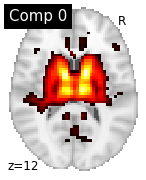

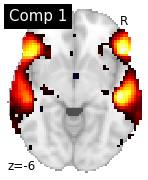

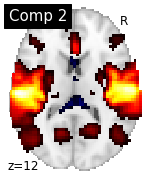

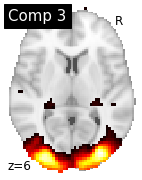

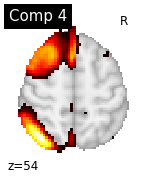

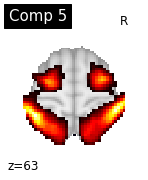

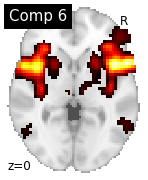

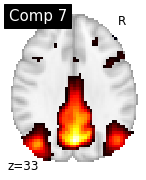

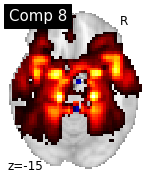

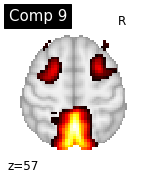

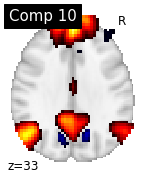

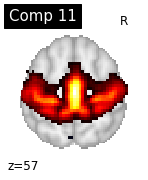

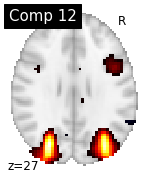

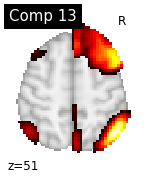

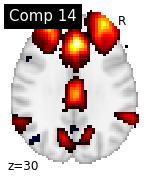

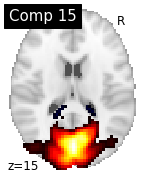

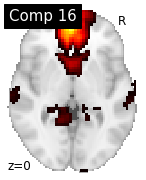

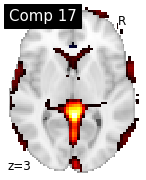

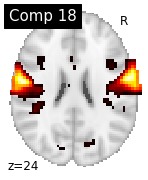

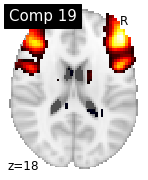

In [45]:
for i, cur_img in enumerate(iter_img(dictlearning_components_img)):
    plot_stat_map(cur_img, display_mode="z", title="Comp %d" % i,
                  cut_coords=1, colorbar=False)


show()

In [46]:
components.shape

(61, 73, 61, 20)

In [47]:
# Use CanICA's masker to project the components back into 3D space
components = canica.components_
components_img = canica.masker_.inverse_transform(components)

In [48]:

masker = NiftiMapsMasker(components_img, smoothing_fwhm=6,
                         standardize=True, detrend=True,
                         t_r=2.5, low_pass=0.1,
                         high_pass=0.01)

In [49]:
subjects_timeseries = {}
for subject_func in func:
#     print (subject_func.split('\\'))
    key = get_key(subject_func.split('\\')[-1])
    subjects_timeseries[key] = masker.fit_transform(subject_func)

#     subjects_timeseries.append(masker.fit_transform(subject_func))
    
#     
# Visualizing extracted timeseries signals. We import matplotlib.pyplot
import matplotlib.pyplot as plt


In [50]:
subjects_timeseries

{'NYU_0050952': array([[-0.03929276,  0.00757366, -0.01458936, ...,  0.03127502,
          0.04808265, -0.01628639],
        [ 1.12377473,  1.85854492,  0.17361483, ..., -0.09188995,
          0.44943683,  0.02761901],
        [ 1.95147728,  2.14343   ,  0.85865904, ...,  0.38978179,
          0.09082469,  0.65347396],
        ...,
        [-1.01482167, -1.81201762,  0.53887885, ..., -0.50571893,
         -1.5775403 , -0.69335886],
        [-1.01612712, -1.67734274,  0.09170207, ..., -0.52267163,
         -1.35017125, -0.77433839],
        [-0.12682464, -0.01967584, -0.12233545, ..., -0.01748223,
          0.02086571, -0.02649994]]),
 'NYU_0050954': array([[-0.11900712, -0.04400888, -0.07513561, ..., -0.00590613,
         -0.03384824, -0.05358641],
        [-0.57199628,  0.49829654,  0.84596499, ...,  0.33693031,
         -1.24589939,  0.37119564],
        [ 0.25278738,  0.26100062,  1.2389488 , ...,  0.17585703,
         -1.51017975,  0.20697204],
        ...,
        [-0.07161928, -0

In [51]:
correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrices = correlation_measure.fit_transform(subjects_timeseries.values())
key_indices = subjects_timeseries.keys()
# key_indices
# for i in subjects_timeseries:
#     correlation_matrices[i] = correlation_measure.fit_transform(subjects_timeseries[i])

dict_keys(['NYU_0050952', 'NYU_0050954', 'NYU_0050955', 'NYU_0050956', 'NYU_0050957', 'NYU_0050958', 'NYU_0050959', 'NYU_0050960', 'NYU_0050961', 'NYU_0050962', 'NYU_0050964', 'NYU_0050965', 'NYU_0050966', 'NYU_0050967', 'NYU_0050968', 'NYU_0050969', 'NYU_0050970', 'NYU_0050972', 'NYU_0050973', 'NYU_0050974', 'NYU_0050976', 'NYU_0050977', 'NYU_0050978', 'NYU_0050979', 'NYU_0050981', 'NYU_0050982', 'NYU_0050983', 'NYU_0050984', 'NYU_0050985', 'NYU_0050986', 'NYU_0050987', 'NYU_0050988', 'NYU_0050989', 'NYU_0050990', 'NYU_0050991', 'NYU_0050992', 'NYU_0050993', 'NYU_0050994', 'NYU_0050995', 'NYU_0050996', 'NYU_0050997', 'NYU_0050999', 'NYU_0051000', 'NYU_0051001', 'NYU_0051002', 'NYU_0051003', 'NYU_0051006', 'NYU_0051007', 'NYU_0051008', 'NYU_0051009', 'NYU_0051010', 'NYU_0051011', 'NYU_0051012', 'NYU_0051013', 'NYU_0051014', 'NYU_0051015', 'NYU_0051016', 'NYU_0051017', 'NYU_0051018', 'NYU_0051019', 'NYU_0051020', 'NYU_0051021', 'NYU_0051023', 'NYU_0051024', 'NYU_0051025', 'NYU_0051026',

In [86]:
correlation_matrices.shape

(172, 20, 20)

In [53]:
# labels

In [54]:
# abide_correlations = []
# control_correlations = []
# for i in subjects_timeseries:
#     print(labels[i])
#     if labels[i] == 1:
#         abide_correlations.append(correlation_matrices[i])
#     else:
#         control_correlations.append(correlation_matrices[i])

C:\Users\Reek\anaconda3.0\envs\data_mining2\lib\site-packages\numpy\ma\core.py:2795: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)
C:\Users\Reek\anaconda3.0\envs\data_mining2\lib\site-packages\nilearn\plotting\displays.py:99: UserWarning: No contour levels were found within the data range.
  **kwargs)
C:\Users\Reek\anaconda3.0\envs\data_mining2\lib\site-packages\nilearn\plotting\displays.py:99: UserWarning: linewidths is ignored by contourf
  **kwargs)


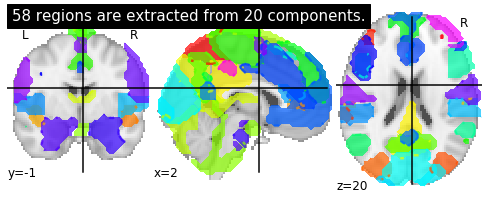

In [55]:
# region extraction
extractor = RegionExtractor(components_img, threshold=2.,
                            thresholding_strategy=
                            'ratio_n_voxels',
                            extractor='local_regions',
                            standardize=True,
                            min_region_size=1350)


extractor.fit()

regions_extracted_img = extractor.regions_img_


n_regions_extracted = regions_extracted_img.shape[-1]

# Visualization of region extraction results
title = ('%d regions are extracted from %d components.'
         % (n_regions_extracted, 20))
plotting.plot_prob_atlas(regions_extracted_img,
                         view_type='filled_contours',
                         title=title, threshold=0.008)

C:\Users\Reek\anaconda3.0\envs\data_mining2\lib\site-packages\nilearn\plotting\displays.py:99: UserWarning: linewidths is ignored by contourf
  **kwargs)
C:\Users\Reek\anaconda3.0\envs\data_mining2\lib\site-packages\numpy\ma\core.py:2795: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)
C:\Users\Reek\anaconda3.0\envs\data_mining2\lib\site-packages\nilearn\plotting\displays.py:99: UserWarning: No contour levels were found within the data range.
  **kwargs)
C:\Users\Reek\anaconda3.0\envs\data_mining2\lib\site-packages\nilearn\_utils\param_validation.py:71: UserWarning: The given float value must not exceed 0.006231001578271389. But, you have given threshold=0.008 
  threshold))
C:\Users\Reek\anaconda3.0\envs\data_mining2\lib\site-packages\nilearn\plotting\displays.py:776: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))
C:\Users\Reek\anaconda3.0\envs\data_mining2\lib\site-packages\nilearn\_utils\param_validati

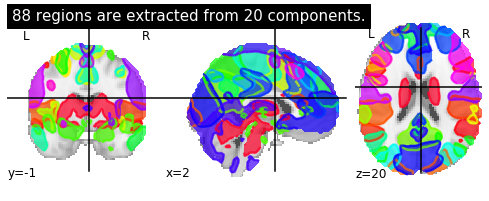

In [56]:
# dictionary learning method2
# dictlearning_components_img



extractor = RegionExtractor(dictlearning_components_img, threshold=2.,
                            thresholding_strategy=
                            'ratio_n_voxels',
                            extractor='local_regions',
                            standardize=True,
                            min_region_size=1350)


extractor.fit()

regions_extracted_img = extractor.regions_img_


n_regions_extracted = regions_extracted_img.shape[-1]

# Visualization of region extraction results
title = ('%d regions are extracted from %d components.'
         % (n_regions_extracted, 20))
plotting.plot_prob_atlas(regions_extracted_img,
                         view_type='filled_contours',
                         title=title, threshold=0.008)

In [57]:
correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrices = correlation_measure.fit_transform(subjects_timeseries.values())
subject_id = list(subjects_timeseries.keys())
subject_id[0]

'NYU_0050952'

In [58]:
abide_correlations = []
control_correlations = []
for i in subjects_timeseries.keys():
#     print(i)
#     print(subject_id.index(i))
    if labels[i] == 1:
        abide_correlations.append(correlation_matrices[subject_id.index(i)])
    else:
        control_correlations.append(correlation_matrices[subject_id.index(i)])

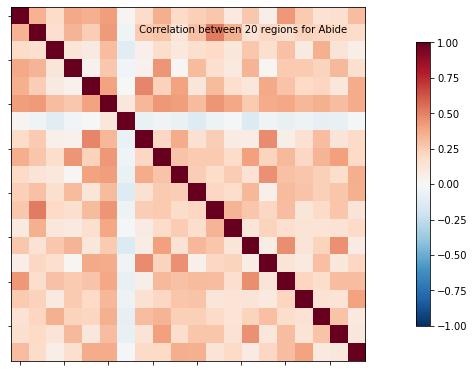

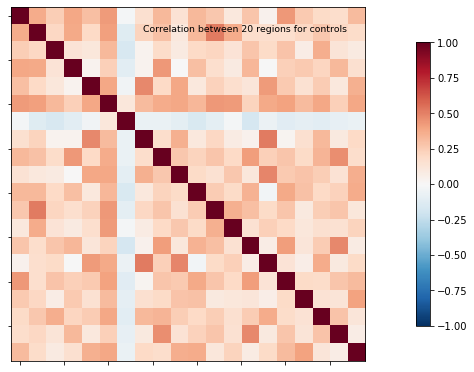

In [59]:
#Getting the mean correlation matrix across all treatment subjects
mean_correlations_abide = np.mean(abide_correlations, axis=0).reshape(subjects_timeseries[subject_id[0]].shape[-1],
                                                          subjects_timeseries[subject_id[0]].shape[-1])
#Getting the mean correlation matrix across all control subjects
mean_correlations_control = np.mean(control_correlations, axis=0).reshape(subjects_timeseries[subject_id[0]].shape[-1],
                                                          subjects_timeseries[subject_id[0]].shape[-1])
#Visualizing the mean correlation
plotting.plot_matrix(mean_correlations_abide, vmax=1, vmin=-1,
                               colorbar=True, title='Correlation between 20 regions for Abide')
plotting.plot_matrix(mean_correlations_control, vmax=1, vmin=-1,
                               colorbar=True, title='Correlation between 20 regions for controls')

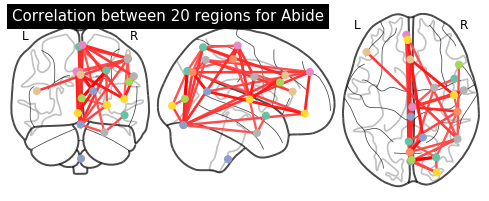

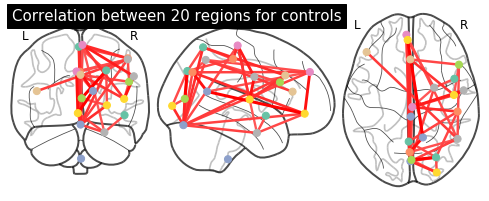

In [89]:
#Getting the center coordinates from the component decomposition to use as atlas labels
coords = plotting.find_probabilistic_atlas_cut_coords(components_img)
#Plotting the connectome with 80% edge strength in the connectivity
plotting.plot_connectome(mean_correlations_abide, coords,
                         edge_threshold="80%", title='Correlation between 20 regions for Abide')
plotting.plot_connectome(mean_correlations_control, coords,
                         edge_threshold="80%", title='Correlation between 20 regions for controls')
plotting.show()

In [61]:
correlation_matrices.shape

(172, 20, 20)

In [62]:
# prev_path = os.path.join(fetched_data,flist[0],flist2[0])
# file_names = os.listdir(prev_path)

# full_file_names = []
# for i in file_names:
#     full_file_names.append(prev_path+"\\"+i)
    
# full_file_names

# from nilearn.connectome import ConnectivityMeasure

# correlations = []

# # Initializing ConnectivityMeasure object with kind='correlation'
# connectome_measure = ConnectivityMeasure(kind='correlation')
# for filename in subjects_timeseries:
#     print (filename)
# #     # call transform from RegionExtractor object to extract timeseries signals
#     timeseries_each_subject = extractor.transform(full_file_names)
# #     # call fit_transform from ConnectivityMeasure object
#     correlation = connectome_measure.fit_transform([timeseries_each_subject])
# #     # saving each subject correlation to correlations
#     correlations.append(correlation)

# # Mean of all correlations
# # import numpy as np
# # mean_correlations = np.mean(correlations, axis=0).reshape(n_regions_extracted,
# #                                                           n_regions_extracted)

In [63]:

from sklearn.linear_model import RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from nilearn.connectome import sym_matrix_to_vec

In [64]:
# n_splits=10 default for 10 fold cross validation
str_shuffle_spt = StratifiedShuffleSplit(n_splits=10,test_size=.2,random_state=0)

In [65]:

stratified_shuffle_split = StratifiedShuffleSplit(test_size=.2)


measures = ['correlation', 'partial correlation', 'tangent']
predictors = [
    ('svc_l2', LinearSVC(C=1)),
    ('svc_l1', LinearSVC(C=1, penalty='l1', dual=False)),
    ('ridge_classifier', RidgeClassifier()),
]


In [66]:
y=[]
for i in subjects_timeseries.keys():
    y.append(labels[i])
type(y)

list

In [67]:



for measure in measures:
    conn_est = ConnectivityMeasure(kind=measure)
    conn_matrices = conn_est.fit_transform(subjects_timeseries.values())
    X = sym_matrix_to_vec(conn_matrices)
    
    for name, predictor in predictors:
#         print (measure)
#         print (name)
        print(measure, name, np.mean(cross_val_score(predictor, X, np.array(y), cv=stratified_shuffle_split.split(X,y))))
#       print( cross_val_score(predictor, X, np.array(y), cv=stratified_shuffle_split.split(X,y)))
      
#         classifier = predictor
#         for train_index,test_index in stratified_shuffle_split.split(X,y):
#             predictor.fit(X[train_index],y[train_index])
#             y_score = predictor.decision_function(X[test_index])
#             average_precision = average_precision_score(y[test_index], y_score)
#             print('Average precision-recall score: {0:0.2f}'.format(
#                 average_precision))
#             disp = plot_precision_recall_curve(predictor, X[test_index], y[test_index])
#             disp.ax_.set_title('2-class Precision-Recall curve: '
#                                'AP={0:0.2f}'.format(average_precision))
#             print(y_score)



correlation svc_l2 0.6257142857142857


C:\Users\Reek\anaconda3.0\envs\data_mining2\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Reek\anaconda3.0\envs\data_mining2\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Reek\anaconda3.0\envs\data_mining2\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Reek\anaconda3.0\envs\data_mining2\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Reek\anaconda3.0\envs\data_mining2\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarni

correlation svc_l1 0.6571428571428571
correlation ridge_classifier 0.6314285714285715
partial correlation svc_l2 0.5142857142857142
partial correlation svc_l1 0.6600000000000001
partial correlation ridge_classifier 0.62


C:\Users\Reek\anaconda3.0\envs\data_mining2\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


tangent svc_l2 0.6285714285714286
tangent svc_l1 0.6714285714285715
tangent ridge_classifier 0.6428571428571429


In [71]:
y.shape,X.shape

AttributeError: 'list' object has no attribute 'shape'

<function concatenate at 0x000001D5E0050708>
svc_l2
Average precision-recall for correlation svc_l2 score: 0.58


C:\Users\Reek\anaconda3.0\envs\data_mining2\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Reek\anaconda3.0\envs\data_mining2\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Reek\anaconda3.0\envs\data_mining2\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Reek\anaconda3.0\envs\data_mining2\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Reek\anaconda3.0\envs\data_mining2\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarni

<function concatenate at 0x000001D5E0050708>
svc_l1
Average precision-recall for correlation svc_l1 score: 0.68
<function concatenate at 0x000001D5E0050708>
ridge_classifier
Average precision-recall for correlation ridge_classifier score: 0.65
<function concatenate at 0x000001D5E0050708>
svc_l2
Average precision-recall for partial correlation svc_l2 score: 0.54
<function concatenate at 0x000001D5E0050708>
svc_l1
Average precision-recall for partial correlation svc_l1 score: 0.75
<function concatenate at 0x000001D5E0050708>
ridge_classifier
Average precision-recall for partial correlation ridge_classifier score: 0.57
<function concatenate at 0x000001D5E0050708>
svc_l2
Average precision-recall for tangent svc_l2 score: 0.72
<function concatenate at 0x000001D5E0050708>
svc_l1
Average precision-recall for tangent svc_l1 score: 0.57
<function concatenate at 0x000001D5E0050708>
ridge_classifier
Average precision-recall for tangent ridge_classifier score: 0.57


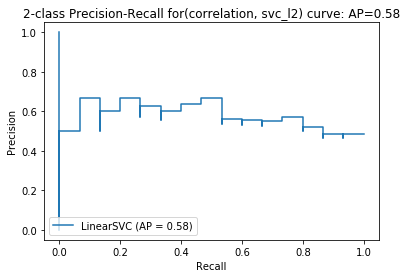

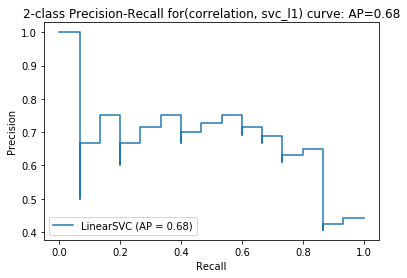

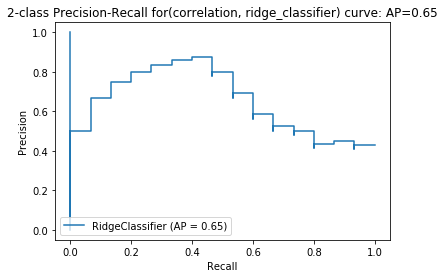

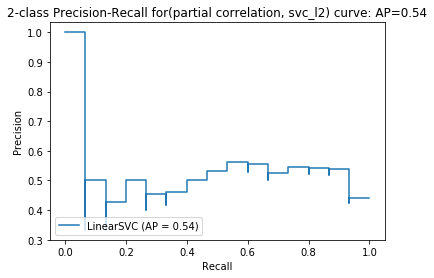

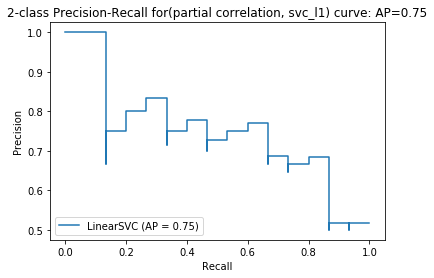

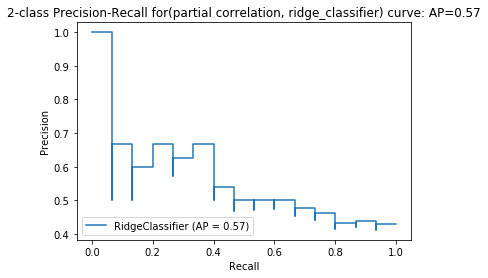

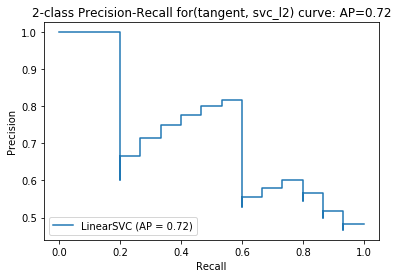

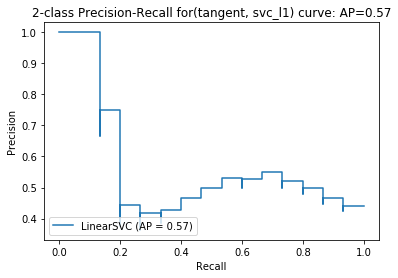

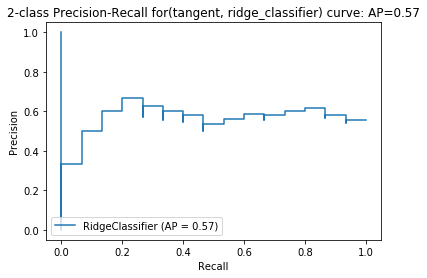

In [77]:
y=np.array(y)
for measure in measures:
    conn_est = ConnectivityMeasure(kind=measure)
    conn_matrices = conn_est.fit_transform(subjects_timeseries.values())
    X = sym_matrix_to_vec(conn_matrices)
    
    for name, predictor in predictors:
        test_set = []
        for train_index,test_index in stratified_shuffle_split.split(X,y):
            predictor.fit(X[train_index],y[train_index])
            test_set.append(test_index)
        
        print(np.concatenate)
#          10 graphs for each case
        for i in test_set:
            y_score = predictor.decision_function(X[test_index])
            average_precision = average_precision_score(y[test_index], y_score)
            
        print(name)
        print('Average precision-recall for '+measure+" "+name +' score: {0:0.2f}'.format(
                average_precision))
        disp = plot_precision_recall_curve(predictor, X[test_index], y[test_index])
        disp.ax_.set_title('2-class Precision-Recall for('+measure+", "+name+') curve: '
                               'AP={0:0.2f}'.format(average_precision))
#             print(y_score)
    